## Contour plots

There are a few different ways to generate contour maps / density plots / heat maps etc in matplotlib

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.cm as cm          ## this is a library of different color maps
                                    ## see https://matplotlib.org/examples/color/colormaps_reference.html
    
from matplotlib import colors       ## this is needed for logarithmically-scaled color maps


Let's generate some example data:

The potential energy felt by an electron due to a point charge is given by $$U = \frac{e}{4\pi\epsilon_0} \frac{q}{r}$$ where $q$ is the charge and $r$ is the distance from the charge

To calculate the potential energy due to a set of point charges, we sum over the individual contributions.
 $$U = \frac{e}{4\pi\epsilon_0} \sum_i \frac{q_i}{r_i}$$

Let's consider the potential energy landscape seen by an electron at a fixed height above a set of random, positive point charges in a 2D plane

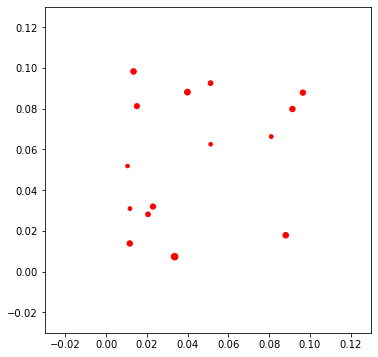

[0.08812624 0.01160649 0.01168669 0.03989151 0.0810046  0.02057537
 0.02299777 0.09140365 0.033614   0.05128972 0.05124821 0.09653144
 0.01048934 0.01511383 0.01345936]


In [4]:
## define some constants
coeff = 8.99E9     # (1/4 pi eps0)
elec = -1.6E-19    # charge of electron
nC = 1E-9          # nano Coulomb


## select random charge values between 10 and +50 nC
num_charges = 15
min_charge = 10      
max_charge = 50
charges = min_charge+ (max_charge-min_charge)*np.random.rand(num_charges)


## random placements in a square of size 10 cm
square_size=0.1
height = 3E-3
x,y = square_size*np.random.rand(2, num_charges)


## scatter plot of positions, polarity and charge magnitude
fig1 = plt.figure(figsize=(6,6))
ax1=fig1.add_subplot(111)
ax1.scatter(x, y, s=charges, color='red')
ax1.set_aspect('equal')
ax1.set_xlim(-0.03, 0.13)
ax1.set_ylim(-0.03, 0.13)
plt.show()
print(x)

In [6]:
## grid on which to calculate the potential energies
xg, yg = np.linspace(-0.03, 0.13, 201), np.linspace(-0.03, 0.13, 201)
X, Y = np.meshgrid(xg,yg)

PE = np.zeros_like(X)
for i in range(num_charges):
    PE += coeff * elec * charges[i] * nC / np.sqrt( (X-x[i])**2 + (Y-y[i])**2 + height**2)

Simple (hollow and filled) contour plots with manual levels

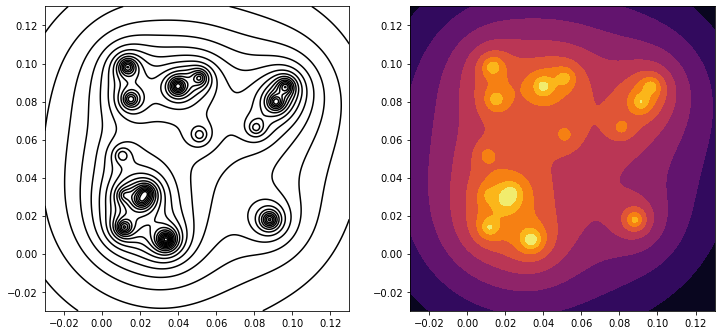

In [10]:
fig2 = plt.figure(figsize=(12,6))

ax2 = fig2.add_subplot(121)

#linearly-spaced contours
levels = np.linspace(PE.min(), PE.max(), 20)
ax2.contour(X, Y, PE, levels=levels, colors='k', linestyles='-')
ax2.set_aspect('equal')


ax3 = fig2.add_subplot(122)

#logarithmically-spaced contours - to make things easier, we will plot the absolute value of PE
levelstemp = np.linspace( np.log10(abs(PE).min()), np.log10(abs(PE).max()), 10)
levels2 = (np.power(10, levelstemp))
levels2.sort()
cplot= ax3.contourf(X, Y, abs(PE), levels=levels2, cmap=cm.inferno, norm=colors.LogNorm(vmin=abs(PE).min(), vmax=abs(PE).max()))
ax3.set_aspect('equal')
plt.show()

<br>
<br>

We can also create a __density__ or __heat map__ from this type of data by changing the colour of every pixel to match the value at that point

To do this we have two options:
 1. we can use ax.imshow(), which is what matplotlib uses to display pictures, with an appropriate color map
 2. we can use ax.pcolormesh() (or the similar pcolor, which is slower)
 
Note that pcolormesh defines its origin as the bottom-left corner, and imshow uses the top-left (this is an image-processing convention.....)

For this reason, we will use pcolormesh 


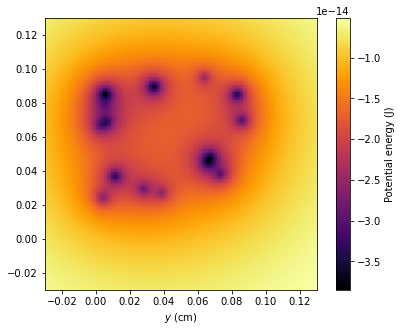

In [5]:
fig3 = plt.figure(figsize=(7, 5))
axmesh = fig3.add_subplot(111)

pcm = axmesh.pcolormesh(X, Y, PE, cmap=cm.inferno)
axmesh.set_aspect('equal')
axmesh.set_xlabel(r'$x$ (cm)')
axmesh.set_xlabel(r'$y$ (cm)')


#add a colour bar
cbar = fig3.colorbar(pcm)
cbar.set_label('Potential energy (J)')

plt.show()

Note that it is important to choose a colour map that is appropriate to the data being plotted.

For example, if we have a quantity that takes both positive and negative values, we may want to use 
a diverging colour map to emphasise this

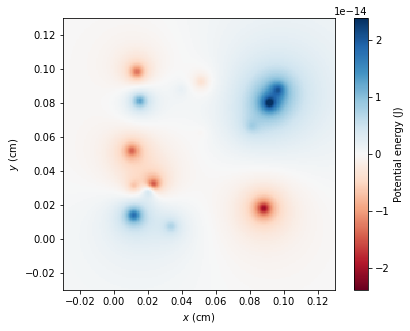

In [12]:
#as before, but with charges of both sign
charges2 = -max_charge+ (2*max_charge)*np.random.rand(num_charges)
x2,y2 = square_size*np.random.rand(2, num_charges)
PE2 = np.zeros_like(X)
for i in range(num_charges):
    PE2 += coeff * elec * charges2[i] * nC / np.sqrt( (X-x[i])**2 + (Y-y[i])**2 + height**2)

fig4 = plt.figure(figsize=(7, 5))
axmesh2 = fig4.add_subplot(111)

pcm2 = axmesh2.pcolormesh(X, Y, PE2, cmap=cm.RdBu, vmin=0.9*min(PE2.min(), -PE2.max()), vmax=0.9*max(PE2.max(), -PE2.min() ))
axmesh2.set_aspect('equal')
axmesh2.set_xlabel(r'$x$ (cm)')
axmesh2.set_ylabel(r'$y$ (cm)')


#add a colour bar
cbar2 = fig4.colorbar(pcm2)
cbar2.set_label('Potential energy (J)')

plt.show()

<br>
<br>

## 3D plotting

The easiest way to produce 3D plots is to 
1. import Axes3D, 
2. then set projection to 3D 
3. and use ax.plot, ax.scatter and/or ax.plot_surface

In [7]:
from mpl_toolkits.mplot3d import Axes3D

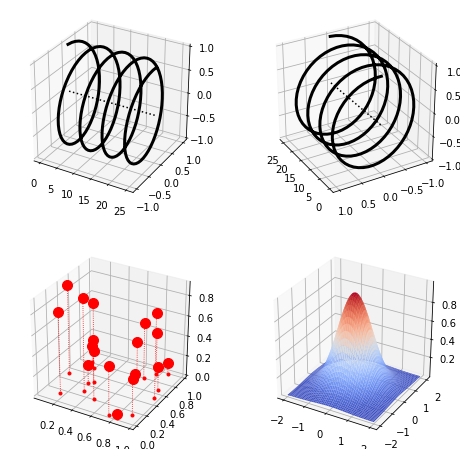

In [8]:
fig3d = plt.figure(figsize=(8,8))


ax3d = fig3d.add_subplot(221, projection='3d')

#spiral data
x3 = np.linspace(0, 8*np.pi, 201)
y3 = np.sin(x3)
z3 = np.cos(x3)
zer = np.zeros_like(x3)
ax3d.plot(x3, zer, zer, 'k:')
ax3d.plot(x3, y3, z3, 'k-', linewidth=3)



ax3db = fig3d.add_subplot(222, projection='3d')

ax3db.plot(x3, zer, zer, 'k:')
ax3db.plot(x3, y3, z3, 'k-', linewidth=3)
ax3db.view_init(30, 150)              #set the elevation and azimuthal angles to change the viewing direction



ax3dc = fig3d.add_subplot(223, projection='3d')

#random points data
x4, y4, z4 = np.random.rand(3, 18)
for a, b, c in zip(x4, y4, z4):
    ax3dc.plot([a], [b], [c], 'ro', markersize=10)
    ax3dc.plot([a], [b], [0], 'ro', markersize=3)
    ax3dc.plot([a,a],[b,b], [c,0],  'r:', linewidth=0.8)


ax3dd = fig3d.add_subplot(224, projection='3d')

#Gaussian surface data
xs = np.linspace(-2, 2, 200)
ys = xs.copy()
Xs,Ys = np.meshgrid(xs,ys)
Zs = np.exp(-(Xs**2 + Ys**2) )

ax3dd.plot_surface(Xs, Ys, Zs, cmap=cm.coolwarm, alpha=0.99) 



plt.show()

See https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html for more detail on the different kinds of 3D plots available in matplotlib